In [19]:
from importlib import reload
from src import parsing
from src import model_path
from src import models_path
from src import model_goal
from src import models_goal
from src import model_interface
from src import visualization
from src import util
from src import config
reload(parsing)
reload(model_path)
reload(models_path)
reload(model_goal)
reload(models_goal)
reload(model_interface)
reload(visualization)
reload(util)
reload(config)

import matplotlib.pyplot as plt

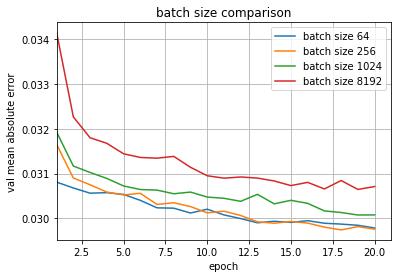

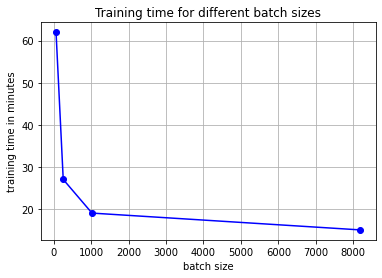

In [24]:
# batch size comparison
reload(visualization)

# history_dict = model_interface.load_history(history_filename)
visualization.draw_losses(
    'val_mean_absolute_error',
    'val mean absolute error',
    ['path_simple_lstm_batch_64', 'path_simple_lstm_batch_256', 'path_simple_lstm_batch_1024', 'path_simple_lstm_batch_8192'],
    ['batch size 64', 'batch size 256', 'batch size 1024', 'batch size 8192'],
    'batch size comparison',
    save_file='batch_size_comparison_lstm_val_mean_absolute_error',
    )

# visualization.draw_losses(
#     'mean_absolute_error',
#     'mean absolute error',
#     ['path_simple_lstm_batch_64', 'path_simple_lstm_batch_256', 'path_simple_lstm_batch_1024', 'path_simple_lstm_batch_8192'],
#     ['batch size 64', 'batch size 256', 'batch size 1024', 'batch size 8192'],
#     'batch size comparison',
#     save_file='batch_size_comparison_lstm_mean_absolute_error',
#     )


# training time for different batch sizes
batch_sizes = [8192, 1024, 256, 64]
training_time = [15, 19, 27, 62]

fig, ax = plt.subplots()
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.plot(batch_sizes, training_time, 'bo-')
plt.xlabel('batch size')
plt.ylabel('training time in minutes')
plt.title('Training time for different batch sizes')
plt.savefig(f"batch_size_comparison_lstm_training_time.pdf")
plt.show()
